## Import modules

In [1]:
import os
from matplotlib import pyplot as plt
import pybasic

## Declare image directory paths

In [2]:
path_to_demo_examples = 'path/to/demoexamples/'
path_to_demo_examples = '/Users/lorenz.lamm/PhD_projects/BaSiC/Demoexamples/'
timelapse_path = os.path.join(path_to_demo_examples, 'timelapse_brightfield/Uncorrected')

## Import image sequence

In [3]:
D = pybasic.tools.load_data(timelapse_path, '.png', working_size=(128, 128), interpolation_method='bilinear')

Loading image sequence...
0 / 100
10 / 100
20 / 100
30 / 100
40 / 100
50 / 100
60 / 100
70 / 100
80 / 100
90 / 100


## Run BaSiC

In [4]:
flatfield = pybasic.basic(D, segmentation=None)

Reweighting Iteration 1
Iteration 1  |W|_0  1 |E1|_0 0  stopCriterion 0.41076390862912615 B1_offset 0
Iteration 2  |W|_0  3 |E1|_0 0  stopCriterion 0.13907842299394105 B1_offset 0
Iteration 3  |W|_0  4 |E1|_0 0  stopCriterion 0.08652055938964025 B1_offset 0
Iteration 4  |W|_0  4 |E1|_0 0  stopCriterion 0.06196838568731831 B1_offset 0
Iteration 5  |W|_0  6 |E1|_0 0  stopCriterion 0.05490027725707756 B1_offset 0
Iteration 6  |W|_0  10 |E1|_0 0  stopCriterion 0.03654557274175826 B1_offset 0
Iteration 7  |W|_0  15 |E1|_0 0  stopCriterion 0.022920020105107564 B1_offset 0
Iteration 8  |W|_0  15 |E1|_0 0  stopCriterion 0.01923862925024133 B1_offset 0
Iteration 9  |W|_0  22 |E1|_0 0  stopCriterion 0.01555347795447783 B1_offset 0
Iteration 10  |W|_0  23 |E1|_0 0  stopCriterion 0.014018306901740815 B1_offset 0
Iteration 11  |W|_0  28 |E1|_0 0  stopCriterion 0.013151956325859339 B1_offset 0
Iteration 12  |W|_0  35 |E1|_0 0  stopCriterion 0.012391048841909112 B1_offset 0
Iteration 13  |W|_0  49 |E

## Prepare images for background fluorescence estimation (stack needs to be a list)

In [5]:
images_list = []
for i in range(D.shape[2]):
    images_list.append(D[:,:,i])

## Estimate background fluorescence

In [6]:
baseflour = pybasic.background_timelapse(images_list, flatfield)

Iteration 1 : 0.022677460075299034
Iteration 2 : 0.022677460075299034
Iteration 3 : 0.022677460075299034
Iteration 4 : 0.022677460075299034
Iteration 5 : 0.022677460075299034
Iteration 6 : 0.022677460075299034
Iteration 7 : 0.022677460075299034
Iteration 8 : 0.022677460075299034
Iteration 9 : 0.022677460075299034
Iteration 10 : 0.022677460075299034
Iteration 11 : 0.022677460075299034
Iteration 12 : 0.022677460075299034
Iteration 13 : 0.022676062517093705
Iteration 14 : 0.022605682005536427
Iteration 15 : 0.02033550449536928
Iteration 16 : 0.015412599791116767
Iteration 17 : 0.011670103370622941
Iteration 18 : 0.00902211911877389
Iteration 19 : 0.006793058190658789
Iteration 20 : 0.0049564960162228125
Iteration 21 : 0.003561417671998698
Iteration 22 : 0.0027235677173674507
Iteration 23 : 0.0017817457932817289
Iteration 24 : 0.001149178125387484
Iteration 25 : 0.0007459008412667269
Iteration 26 : 0.0004658984190575771
Iteration 27 : 0.0002795939845866622
Iteration 28 : 0.0001648722120517

/Users/lorenz.lamm/PhD_projects/BaSiC/pybasic/pybasic/_background.py:116: RuntimeWarning: divide by zero encountered in true_divide
  XE_norm = np.transpose(np.tile(mean_vec, (16384, 1))) / XE_norm


Iteration 1 : 0.022676913496433932
Iteration 2 : 0.022676912548261558
Iteration 3 : 0.022676906277878772
Iteration 4 : 0.022676897635160075
Iteration 5 : 0.02267688350149187
Iteration 6 : 0.022676861250111004
Iteration 7 : 0.022676831881893157
Iteration 8 : 0.022676787716037226
Iteration 9 : 0.022676715297151904
Iteration 10 : 0.022676510574346047
Iteration 11 : 0.022676091366590132
Iteration 12 : 0.022675393879661478
Iteration 13 : 0.022674318681939965
Iteration 14 : 0.022672667197667678
Iteration 15 : 0.022670010501135106
Iteration 16 : 0.022665775776547444
Iteration 17 : 0.022658908189584034
Iteration 18 : 0.022647125656617563
Iteration 19 : 0.022623849857108944
Iteration 20 : 0.02256211067541092
Iteration 21 : 0.021385895462953244
Iteration 22 : 0.0034239876263864573
Iteration 23 : 0.000728263294311214
Iteration 24 : 0.00039119022389142886
Iteration 25 : 0.00021044132471676152
Iteration 26 : 0.00011250668995836572
Iteration 27 : 5.977261164384134e-05
Iteration 28 : 3.19699838084662

## Show results

Flatfield:


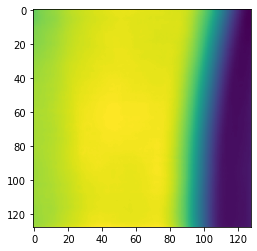

Fluorescence:


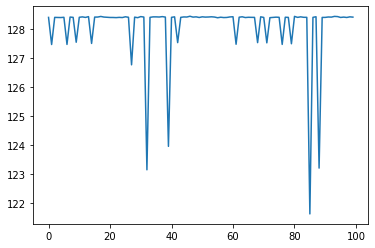

In [7]:
print('Flatfield:')
plt.figure()
plt.imshow(flatfield)
plt.show()
print('Fluorescence:')
plt.figure()
plt.plot(baseflour)
plt.show()